In [1]:
import sys
sys.path.append('C:\\Users\\jkuan\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pycoingecko import CoinGeckoAPI
from datetime import datetime, timezone, date


In [2]:
import math
from scipy.stats import norm

N = norm.cdf

def blackScholesCall(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)


def blackScholesPut(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)


# Daily 
# Example usage:
S = 3300  # Current stock price
K = 20000  # Strike price
T = 4*365    # Time to maturity in years
r = 0.13/365 # Risk-free rate (5%)
sigma = 0.045 # Volatility (20%)

call_price = blackScholesCall(S, K, T, r, sigma)
put_price = blackScholesPut(S, K, T, r, sigma)

print(f"Call Option Price: {call_price}")
print(f"Put Option Price: {put_price}")


Call Option Price: 1155.325143773639
Put Option Price: 9745.736103177525


In [30]:
# Annualised Example:
S = 3300  # Current stock price
K = 4200  # Strike price
T = 4  # Time to maturity in years
r = 0.125 # Risk-free rate (5%)
sigma = 0.85*1.5 # Volatility (20%)

call_price = blackScholesCall(S, K, T, r, sigma)
put_price = blackScholesPut(S, K, T, r, sigma)

print(f"Call Option Price: {call_price}")
print(f"Put Option Price: {put_price}")
print(f"Opportunity Cost: {(np.exp(r*T)-1)*S}")

Call Option Price: 2715.2498688332525
Put Option Price: 1962.6786396263128
Opportunity Cost: 2140.780193310423


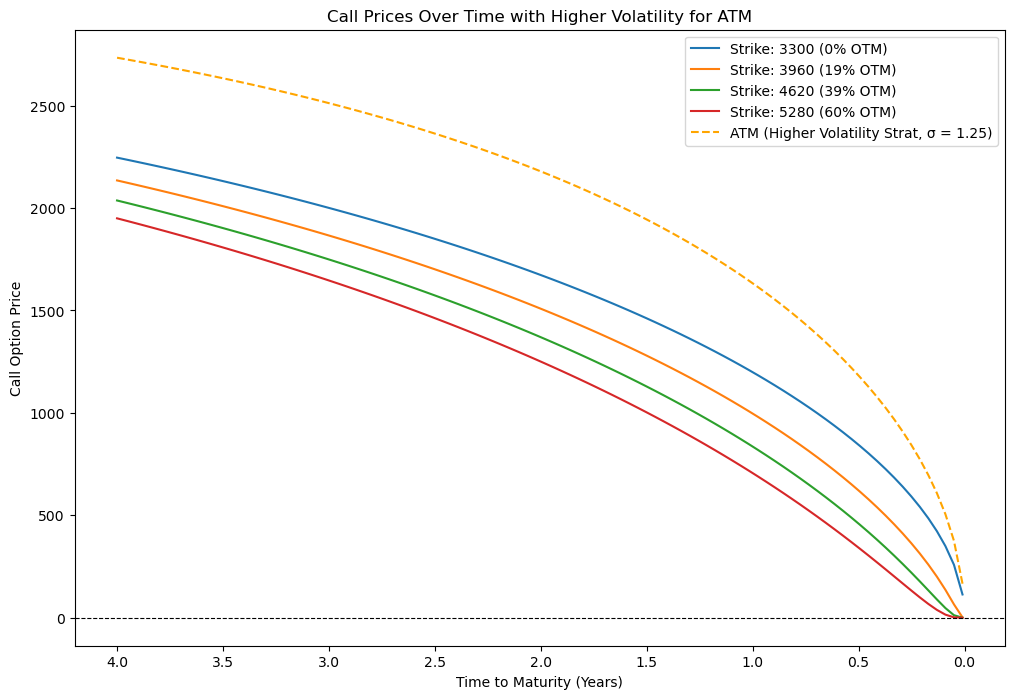

In [4]:
# Parameters
S = 3300      # Current stock price
strike_ratios = [1.0, 1.2, 1.4, 1.6]  # ATM, 20% OTM, 40% OTM, 60% OTM
r = 0.1      # Annual risk-free rate
sigma = 0.85  # Standard annualized volatility
sigma_high = 1.25  # Higher annualized volatility for ATM
T_max = 4     # Time to maturity in years
steps = 100   # Number of time steps

# Time decay intervals
T_values = np.linspace(T_max, 0.01, steps)

# Plot call prices for each strike price
plt.figure(figsize=(12, 8))

for ratio in strike_ratios:
    K = S * ratio  # Strike price
    call_prices = []

    for T in T_values:
        # Calculate call price for given time to maturity
        call_price = blackScholesCall(S, K, T, r, sigma)
        call_prices.append(call_price)

    # Plot call prices
    plt.plot(T_values, call_prices, label=f"Strike: {K:.0f} ({int((ratio-1)*100)}% OTM)")

# Special case for ATM with higher sigma
K_atm = S  # ATM strike
call_prices_high_sigma = []

for T in T_values:
    # Calculate call price for ATM with higher sigma
    call_price_high = blackScholesCall(S, K_atm, T, r, sigma_high)
    call_prices_high_sigma.append(call_price_high)

# Plot ATM with higher sigma
plt.plot(T_values, call_prices_high_sigma, label=f"ATM (Higher Volatility Strat, σ = {sigma_high})", linestyle="--", color="orange")

# Formatting the plot
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Call Prices Over Time with Higher Volatility for ATM")
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Call Option Price")
plt.legend()

# Invert the x-axis
plt.gca().invert_xaxis()


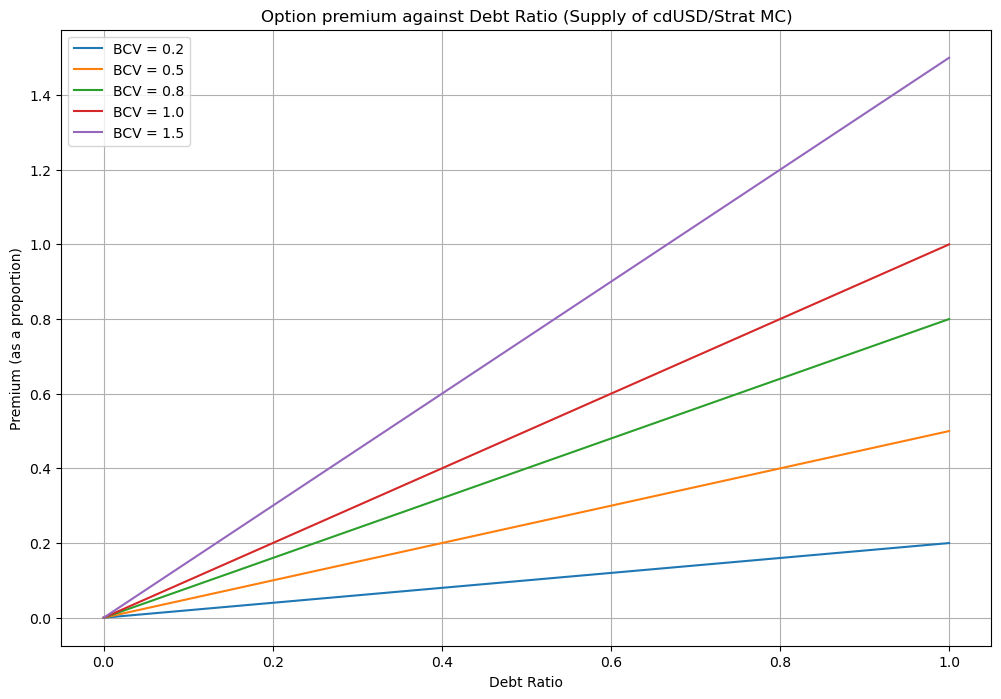

In [12]:
price = 1  # Fixed price

bcv_values = [0.2, 0.5, 0.8, 1.0, 1.5]  # Different levels of BCV
debt_ratios = np.linspace(0, 1, 100)  # Debt ratio values (x-axis)

# Plotting
plt.figure(figsize=(12, 8))

for bcv in bcv_values:
    values = price * (bcv * debt_ratios)  # Formula
    plt.plot(debt_ratios, values, label=f"BCV = {bcv}")

# Formatting the plot
plt.title("Option premium against Debt Ratio (Supply of cdUSD/Strat MC)")
plt.xlabel("Debt Ratio")
plt.ylabel("Premium (as a proportion of Strat Price)")
plt.legend()
plt.grid(True)

plt.show()


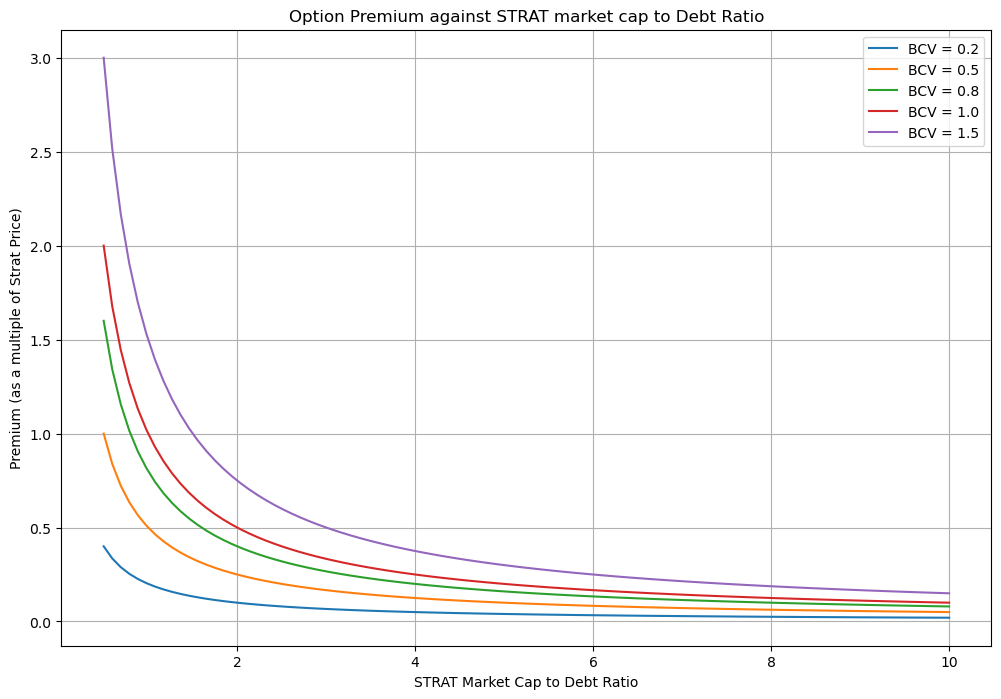

In [27]:
price = 1  # Fixed price

bcv_values = [0.2, 0.5, 0.8, 1.0, 1.5]  # Different levels of BCV
cdUSD = 1
stratMC = np.linspace(0.5, 10, 100)  # Debt ratio values (x-axis)

# Plotting
plt.figure(figsize=(12, 8))

for bcv in bcv_values:
    values = price * (bcv * cdUSD/stratMC)  # Formula
    plt.plot(stratMC, values, label=f"BCV = {bcv}")

# Formatting the plot
plt.title("Option Premium against STRAT market cap to Debt Ratio")
plt.xlabel("STRAT Market Cap to Debt Ratio")
plt.ylabel("Premium (as a multiple of Strat Price)")
plt.legend()
plt.grid(True)

plt.show()


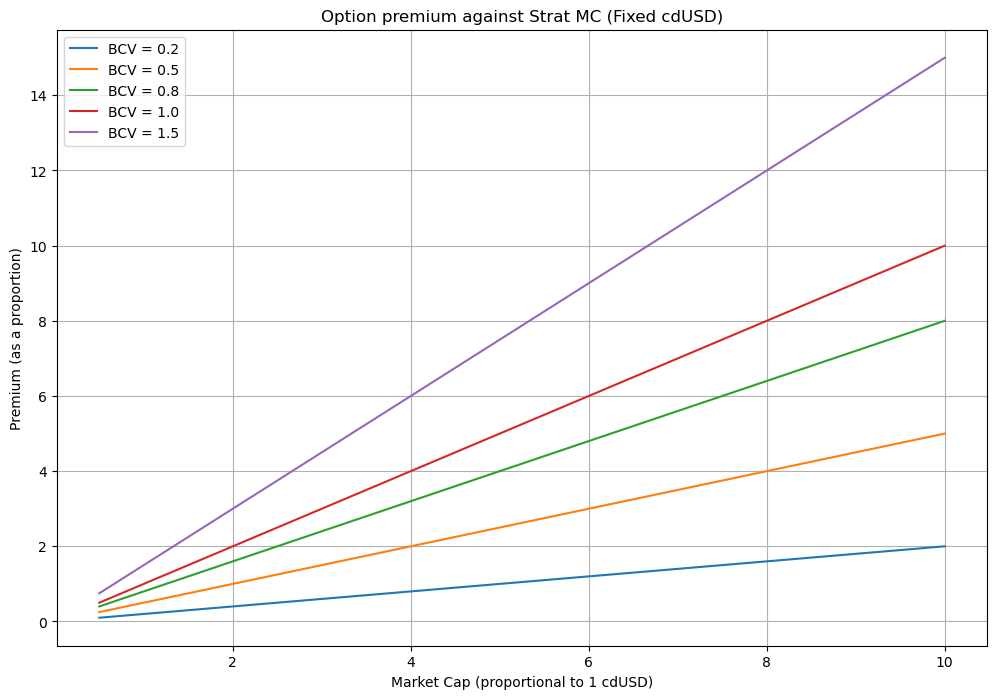

In [23]:
price = 1  # Fixed price

bcv_values = [0.2, 0.5, 0.8, 1.0, 1.5]  # Different levels of BCV
stratMC = 1
cdUSD = np.linspace(0.5, 10, 100)  # Debt ratio values (x-axis)

# Plotting
plt.figure(figsize=(12, 8))

for bcv in bcv_values:
    values = price * (bcv * cdUSD/stratMC)  # Formula
    plt.plot(cdUSD, values, label=f"BCV = {bcv}")

# Formatting the plot
plt.title("Option premium against Strat MC (Fixed cdUSD)")
plt.xlabel("Market Cap (proportional to 1 cdUSD)")
plt.ylabel("Premium (as a proportion)")
plt.legend()
plt.grid(True)

plt.show()


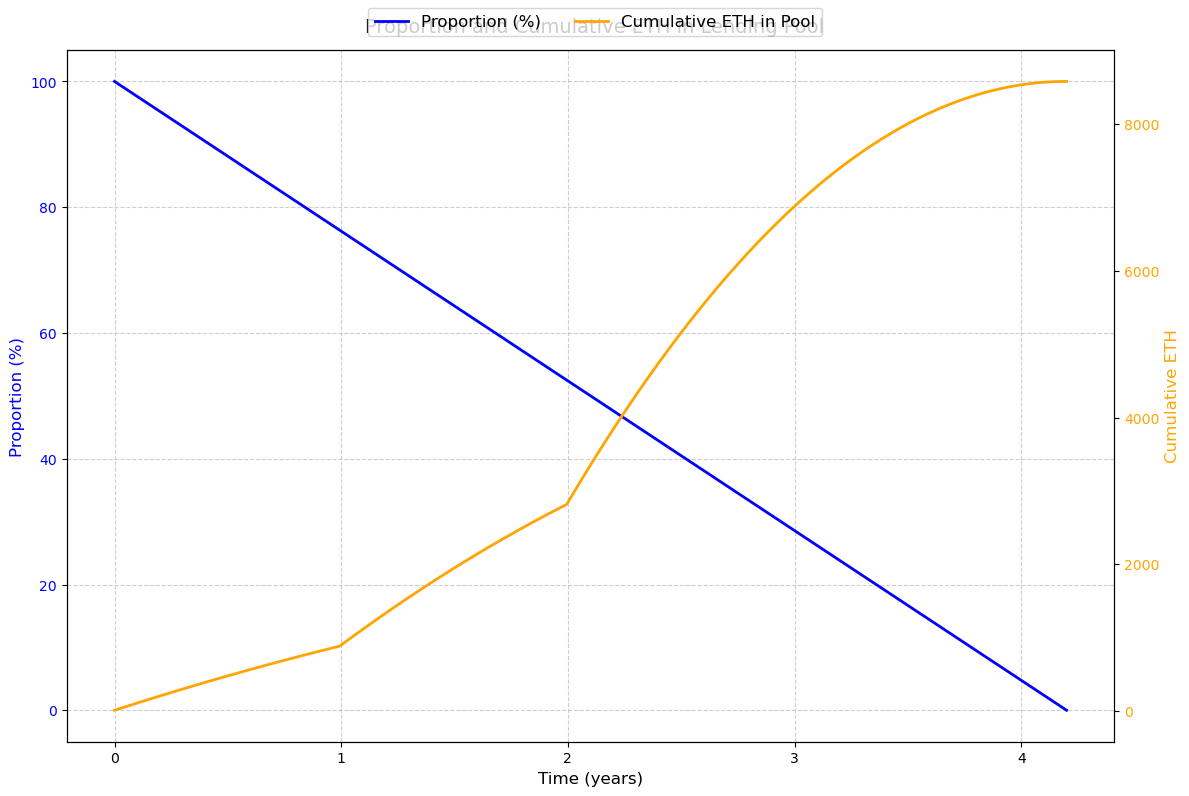

In [67]:
# Parameters
t = np.linspace(0, 4.2, 500)  # Time values from 0 to 4.2 years
y = 100 * (1 - t / 4.2)  # Linear decrease from 100% to 0%

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, y, label="ETH Ratio", color="blue")

# Formatting
plt.title("Proportion of ETH to Loan Pool", fontsize=14)
plt.xlabel("Time (years)", fontsize=12)
plt.ylabel("Value (%)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


Year-by-Year Debugging Output:
Year 1: Total Raised = 8.4 ETH, Total in Pool = 8.4 ETH
Year 2: Total Raised = 1026.9 ETH, Total in Pool = 902.4 ETH
Year 3: Total Raised = 4090.6 ETH, Total in Pool = 2860.2 ETH
Year 4: Total Raised = 14106.6 ETH, Total in Pool = 6894.7 ETH
Year 5: Total Raised = 24122.6 ETH, Total in Pool = 8540.6 ETH


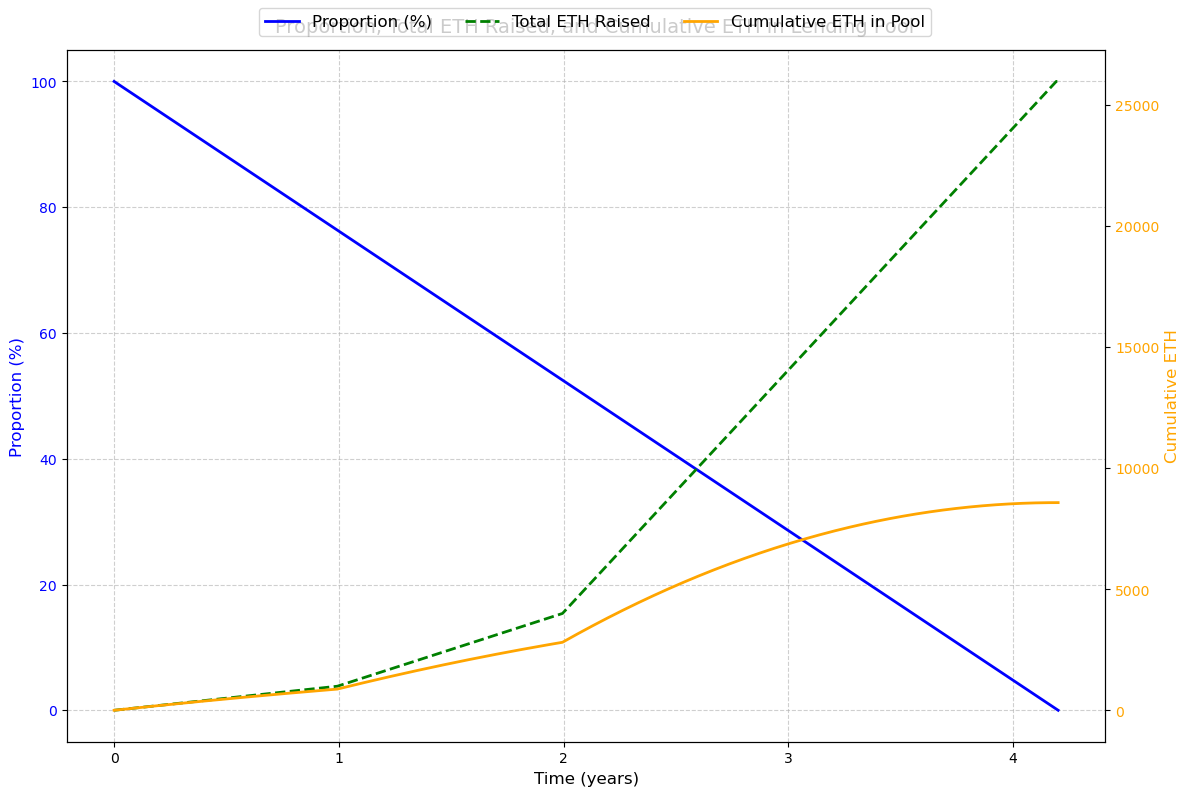

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t = np.linspace(0, 4.2, 500)  # Time values from 0 to 4.2 years
proportion = 1 - t / 4.2  # Proportion of ETH going into the lending pool

# ETH raised per year
eth_raised_per_year = [1000, 3000, 10000, 10000, 2000]  # Correct last year ETH
year_boundaries = [0, 1, 2, 3, 4, 4.2]  # Year boundaries
eth_rate = np.zeros_like(t)

# Distribute ETH rates across time segments
for i in range(len(year_boundaries) - 1):
    mask = (t >= year_boundaries[i]) & (t < year_boundaries[i + 1])
    eth_rate[mask] = eth_raised_per_year[i] / (year_boundaries[i + 1] - year_boundaries[i])

# Calculate cumulative values
eth_to_pool = eth_rate * proportion  # ETH allocated to the lending pool
cumulative_eth_pool = np.cumsum(eth_to_pool) * (t[1] - t[0])  # Lending pool ETH
cumulative_total_eth = np.cumsum(eth_rate) * (t[1] - t[0])  # Total ETH raised

# Debugging: Validate year-by-year results
print("Year-by-Year Debugging Output:")
for i, year in enumerate(range(1, 6)):
    idx = np.searchsorted(t, year_boundaries[i])
    total_raised = cumulative_total_eth[idx]
    total_pool = cumulative_eth_pool[idx]
    print(f"Year {year}: Total Raised = {total_raised:.1f} ETH, Total in Pool = {total_pool:.1f} ETH")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Primary axis: Proportion
ax1.plot(t, proportion * 100, label="Proportion (%)", color="blue", linewidth=2)
ax1.set_xlabel("Time (years)", fontsize=12)
ax1.set_ylabel("Proportion (%)", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(True, which="both", linestyle="--", alpha=0.6)

# Secondary axis: Cumulative ETH
ax2 = ax1.twinx()
ax2.plot(t, cumulative_total_eth, label="Total ETH Raised", color="green", linewidth=2, linestyle="--")
ax2.plot(t, cumulative_eth_pool, label="Cumulative ETH in Pool", color="orange", linewidth=2)
ax2.set_ylabel("Cumulative ETH", color="orange", fontsize=12)
ax2.tick_params(axis="y", labelcolor="orange")

# Titles and legend
fig.suptitle("Proportion, Total ETH Raised, and Cumulative ETH in Lending Pool", fontsize=14)
fig.legend(loc="upper center", ncol=3, fontsize=12)

plt.tight_layout()
plt.show()


In [82]:
cumulative_eth_pool

array([8.41683367e+00, 1.68167999e+01, 2.51998988e+01, 3.35661303e+01,
       4.19154943e+01, 5.02479910e+01, 5.85636202e+01, 6.68623821e+01,
       7.51442765e+01, 8.34093036e+01, 9.16574632e+01, 9.98887555e+01,
       1.08103180e+02, 1.16300738e+02, 1.24481428e+02, 1.32645250e+02,
       1.40792206e+02, 1.48922293e+02, 1.57035514e+02, 1.65131867e+02,
       1.73211353e+02, 1.81273971e+02, 1.89319722e+02, 1.97348605e+02,
       2.05360621e+02, 2.13355770e+02, 2.21334051e+02, 2.29295465e+02,
       2.37240011e+02, 2.45167690e+02, 2.53078502e+02, 2.60972446e+02,
       2.68849523e+02, 2.76709732e+02, 2.84553074e+02, 2.92379549e+02,
       3.00189156e+02, 3.07981896e+02, 3.15757768e+02, 3.23516773e+02,
       3.31258911e+02, 3.38984181e+02, 3.46692584e+02, 3.54384119e+02,
       3.62058787e+02, 3.69716587e+02, 3.77357521e+02, 3.84981586e+02,
       3.92588785e+02, 4.00179116e+02, 4.07752579e+02, 4.15309175e+02,
       4.22848904e+02, 4.30371766e+02, 4.37877760e+02, 4.45366886e+02,
      